#Notebook: Modelado Gaussiano
###Por: Maria Camila Remolina Gutiérrez

En este notebook se hace un fit gaussiano a una fuente

In [1]:
%pylab inline
import os
from astropy.io import fits
from scipy.optimize import leastsq

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Paths
path_gaussian_model = './images/gaussian_model/'

In [3]:
visit_1 = fits.open('./data/supernova/-3.fits')
visit_2 = fits.open('./data/supernova/+3.fits')

data_1 = visit_1[1].data
data_2 = visit_2[1].data

visit_1.close()
visit_2.close()

shape_data = shape(data_1)

print shape_data

(1200, 1200)


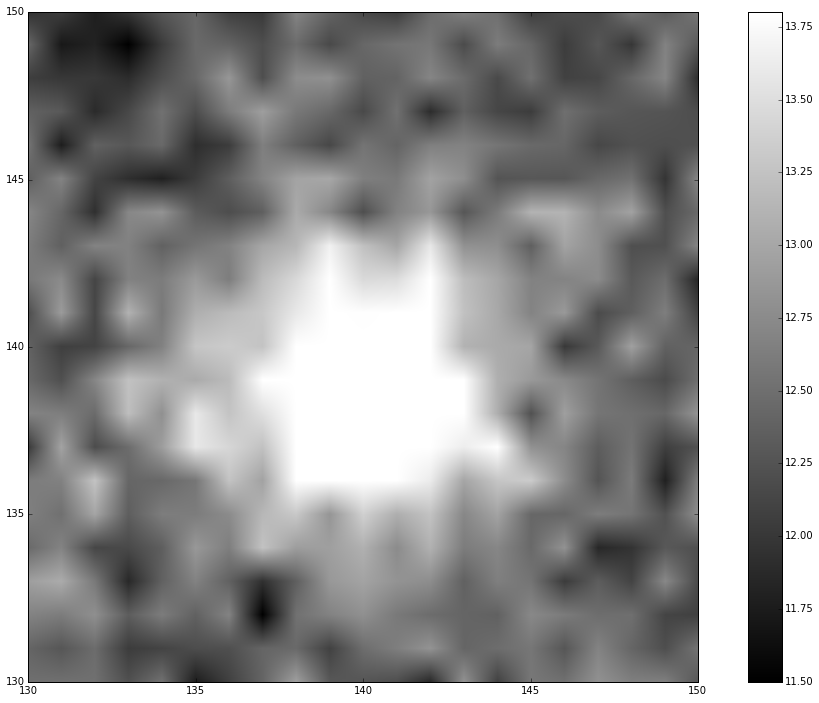

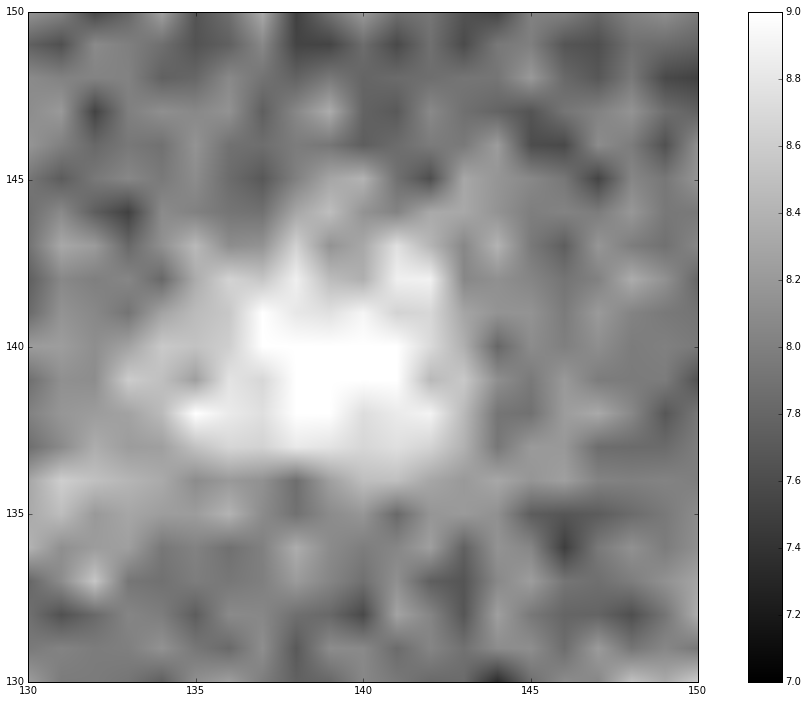

In [4]:
xlim_min = 130
xlim_max = 150
ylim_min = 130
ylim_max = 150

fig = figure(figsize=(18,12))
imshow(data_1, cmap='gray', vmin=11.5, vmax=13.8)
colorbar()
xlim(xlim_min,xlim_max)
ylim(ylim_min,ylim_max)
show()
close()

fig = figure(figsize=(18,12))
imshow(data_2, cmap='gray', vmin=7, vmax=9)
colorbar()
xlim(xlim_min,xlim_max)
ylim(ylim_min,ylim_max)
show()
close()

In [5]:
cut_1 = data_1[ylim_min:ylim_max+1,xlim_min:xlim_max+1]
cut_2 = data_2[ylim_min:ylim_max+1,xlim_min:xlim_max+1]

In [6]:
print shape(cut_1)

(21, 21)


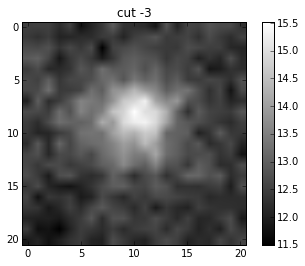

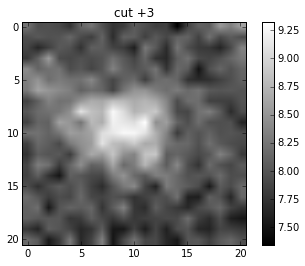

In [7]:
imshow(cut_1, cmap='gray')
colorbar()
title('cut -3')
show()
close()

imshow(cut_2, cmap='gray')
colorbar()
title('cut +3')
show()
close()

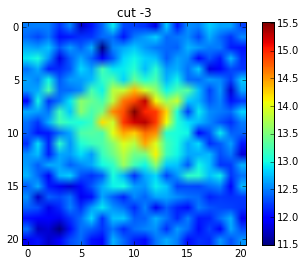

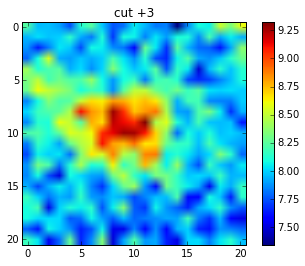

In [8]:
imshow(cut_1)
colorbar()
title('cut -3')
show()
close()

imshow(cut_2)
colorbar()
title('cut +3')
show()
close()

In [9]:
#Source: https://gist.github.com/andrewgiessel/6122739

#Rotation is in radians
def gaussian(x_0, y_0, sigma_x, sigma_y, amplitude, rotation):

    x_0 = x_0*cos(rotation) - y_0*sin(rotation)
    y_0 = x_0*sin(rotation) + y_0*cos(rotation)
    
    def rotgauss(x,y):
        xp = x*cos(rotation) - y*sin(rotation)
        yp = x*sin(rotation) + y*cos(rotation)
        g = amplitude*exp( -( ((xp-x_0)/sigma_x)**2 + ((yp-y_0)/sigma_y)**2 )/2. )
        
        return g
    
    return rotgauss

#Returns x_0, y_0, sigma_x, sigma_y, amplitude, rotation
def moments(matriz):
    total = matriz.sum()
    X, Y = indices(matriz.shape)
    x_0 = (X*matriz).sum()/total
    y_0 = (Y*matriz).sum()/total
    col = matriz[:, int(y_0)]
    sigma_x = np.sqrt(abs((np.arange(col.size)-y_0)**2*col).sum()/col.sum())
    row = matriz[int(x_0), :]
    sigma_y = np.sqrt(abs((np.arange(row.size)-x_0)**2*row).sum()/row.sum())
    amplitude = matriz.max()
    return x_0, y_0, sigma_x, sigma_y, amplitude, 0.0

#Returns x_0, y_0, sigma_x, sigma_y, amplitude, rotation after the fit
def fit_gaussian(matriz):
    parameters = moments(matriz)
    errorfunction = lambda p: ravel(gaussian(*p)(*indices(matriz.shape)) - matriz)
    p, success = leastsq(errorfunction, parameters)
    return p

In [10]:
cut_1_x_0, cut_1_y_0, cut_1_sigma_x, cut_1_sigma_y, cut_1_amplitude, cut_1_rotation = fit_gaussian(cut_1)
cut_2_x_0, cut_2_y_0, cut_2_sigma_x, cut_2_sigma_y, cut_2_amplitude, cut_2_rotation = fit_gaussian(cut_2)

print cut_1_x_0, cut_1_y_0, cut_1_sigma_x, cut_1_sigma_y, cut_1_amplitude, cut_1_rotation
print cut_2_x_0, cut_2_y_0, cut_2_sigma_x, cut_2_sigma_y, cut_2_amplitude, cut_2_rotation

-2842.90028719 -36.6864688318 27.2674698687 26.1954832157 13.3587075746 -1.58715997571
2660.46974391 -211.420071343 39.3618087974 29.2318525704 8.38412785303 -4.62964650577


/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


In [11]:
cut_1_rotgauss = gaussian(cut_1_x_0, cut_1_y_0, cut_1_sigma_x, cut_1_sigma_y, cut_1_amplitude, cut_1_rotation)
cut_2_rotgauss = gaussian(cut_2_x_0, cut_2_y_0, cut_2_sigma_x, cut_2_sigma_y, cut_2_amplitude, cut_2_rotation)

In [12]:
cut_1_fit = cut_1_rotgauss(*indices(cut_1.shape))
cut_2_fit = cut_2_rotgauss(*indices(cut_2.shape))

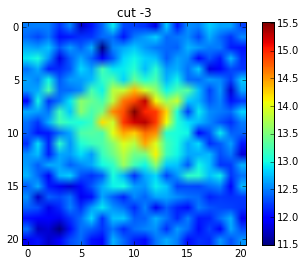

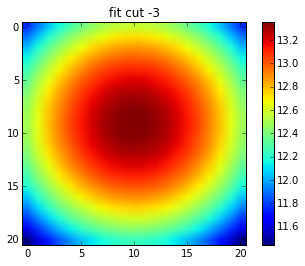

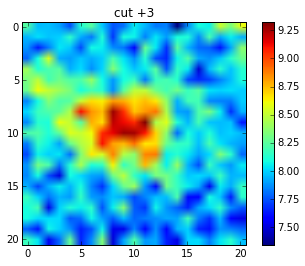

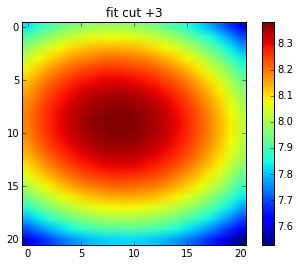

In [13]:
imshow(cut_1)
colorbar()
title('cut -3')
show()
close()

imshow(cut_1_fit)
colorbar()
title('fit cut -3')
show()
close()

imshow(cut_2)
colorbar()
title('cut +3')
show()
close()

imshow(cut_2_fit)
colorbar()
title('fit cut +3')
show()
close()

In [59]:
print amax(cut_1)
print amax(cut_1_fit)

print amax(cut_2)
print amax(cut_2_fit)

15.5246
13.3586543715
9.32679
8.38353080482


###Entonces el kernel queda así:

#$K(x,y)=\frac{1}{\sqrt{2\pi (\sigma_{x_2}^2-\sigma_{x_1}^2)}}e^{- \frac{(x-(\mu_{x_2}-\mu_{x_1}))^2}{2(\sigma_{y_2}^2-\sigma_{y_1}^2)}} \frac{1}{\sqrt{2\pi (\sigma_{y_2}^2-\sigma_{y_1}^2)}}e^{- \frac{(y-(\mu_{y_2}-\mu_{y_1}))^2}{2(\sigma_{y_2}^2-\sigma_{y_1}^2)}}$

###Con valores:
cut_1_x_0, cut_1_y_0, cut_1_sigma_x, cut_1_sigma_y, cut_1_amplitude, cut_1_rotation
print cut_2_x_0, cut_2_y_0, cut_2_sigma_x, cut_2_sigma_y, cut_2_amplitude, cut_2_rotation


###$\mu_{x_1}=-2842.90028719$

###$\mu_{y_1}=-36.6864688318$ 

###$\sigma_{x_1}=27.2674698687$ 

###$\sigma_{y_1}=26.1954832157$

###$A_1=13.3587075746$

###$R_1=-1.58715997571$

###$\mu_{x_2}=2660.46974391$ 

###$\mu_{y_2}=-211.420071343$ 

###$\sigma_{x_1}=39.3618087974$

###$\sigma_{y_1}=29.2318525704$

###$A_1=8.38412785303$

###$R_1=-4.62964650577$